In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler, PowerTransformer

#import sqlalchemy as sa
#from sqlalchemy.orm import sessionmaker
#import getpass  # To get the password without showing the input


In [10]:
#password = getpass.getpass()

In [11]:
#open csv file
#excel_engine = "openpyxl"
#df = pd.read_excel(r".\data\raw\creditcardmarketing.xlsx", engine=excel_engine)
customer_df=pd.read_csv(r".\files_for_lab\customer_value_analysis.csv")
display(customer_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [12]:
#renaming columns, removing "#", padding and replacing spaces with "_"
# Convert all column names to lowercase
customer_df.columns = customer_df.columns.str.lower()

# Remove '#' symbols from column names
customer_df.columns = customer_df.columns.str.replace('#', '')

# Remove leading and trailing spaces from column names
customer_df.columns = customer_df.columns.str.strip()

# Replace spaces with underscores in column names
customer_df.columns = customer_df.columns.str.replace(' ', '_')

# Optionally, you can also remove spaces in the data itself (for string columns)
customer_df = customer_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [13]:
# Calculate the percentage of NaN values in each column
nan_percentage = (customer_df.isna().sum() / len(customer_df)) * 100

# Display the percentage of NaN values for each column
display(nan_percentage)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [14]:
#drop empty and duplicate customers
customer_df.drop_duplicates(subset="customer", keep="first", inplace=True)

#df.dropna(subset=["customer"], inplace=True)

# Reset the DataFrame index after dropping rows
customer_df.reset_index(drop=True, inplace=True)
customer_df.shape

(9134, 24)

In [15]:
#5 Change the type of effective_to_date column to DateTime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Verify the data type conversion
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

C:\Users\i.glavatskyi\AppData\Local\Temp\ipykernel_22588\3977136369.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [16]:
#6 check NaNs per column
nan_counts = customer_df.isna().sum()
nan_counts

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [17]:
#7 Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

def separate_numerical_categorical(df):
    # Initialize empty DataFrames for numerical and categorical columns
    numerical_cols = pd.DataFrame()
    categorical_cols = pd.DataFrame()

    # Loop through columns in the input DataFrame
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # If the column is numeric, add it to the numerical DataFrame
            numerical_cols[column] = df[column]
        else:
            # If the column is not numeric, add it to the categorical DataFrame
            categorical_cols[column] = df[column]

    return numerical_cols, categorical_cols

In [18]:
#8 DropID & separate
customer_df = customer_df.drop('customer', axis=1)

In [66]:
#7 separate

numerical_df, categorical_df = separate_numerical_categorical(customer_df)
print(numerical_df.info(), categorical_df.info(),categorical_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state              9

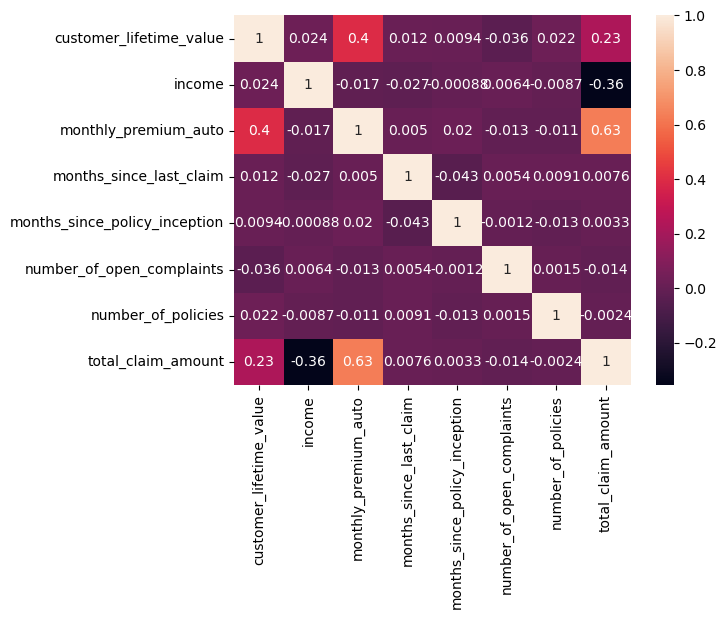

In [20]:
#9 Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation?
correlation_matrix = numerical_df.corr()

# Find the pair of numerical variables with the highest correlation
max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).idxmax()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

#print("\nPair of Numerical Variables with Highest Correlation:")
#print(max_corr_pair)

In [21]:
#10


def separate_continuous_discrete(df, threshold=36):
    """
    Separate numerical columns into continuous and discrete based on the number of unique values.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        threshold (int): Threshold to discriminate between continuous and discrete columns. Default is 36.

    Returns:
        pd.DataFrame: DataFrame containing continuous numerical columns.
        pd.DataFrame: DataFrame containing discrete numerical columns.
    """
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for column in df.columns:
        unique_count = df[column].nunique()
        if unique_count > threshold:
            continuous_df[column] = df[column]
        else:
            discrete_df[column] = df[column]

    return continuous_df, discrete_df


# continuous_df, discrete_df = separate_continuous_discrete(input_df)



In [22]:
continuous_df, discrete_df = separate_continuous_discrete(customer_df)
# print(continuous_df, discrete_df)

In [23]:
#11 Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

import matplotlib.pyplot as plt

def create_barplots(df, figsize=(16, 16)):
    """
    Create bar plots for all columns in the input DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame with discrete columns.
        figsize (tuple): Figure size (width, height). Default is (16, 16).

    Returns:
        None
    """
    num_columns = len(df.columns)
    num_cols_per_row = 4  # Number of columns to display per row

    # Calculate the number of rows needed for subplots
    num_rows = (num_columns + num_cols_per_row - 1) // num_cols_per_row

    plt.figure(figsize=figsize)

    plots = []
    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, num_cols_per_row, i + 1)
        plot = sns.countplot(data=df, x=column)
        plots.append(plot)
        plt.title(column)
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    return plots

# Example usage:
# bar_plots=create_barplots(discrete_df)


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

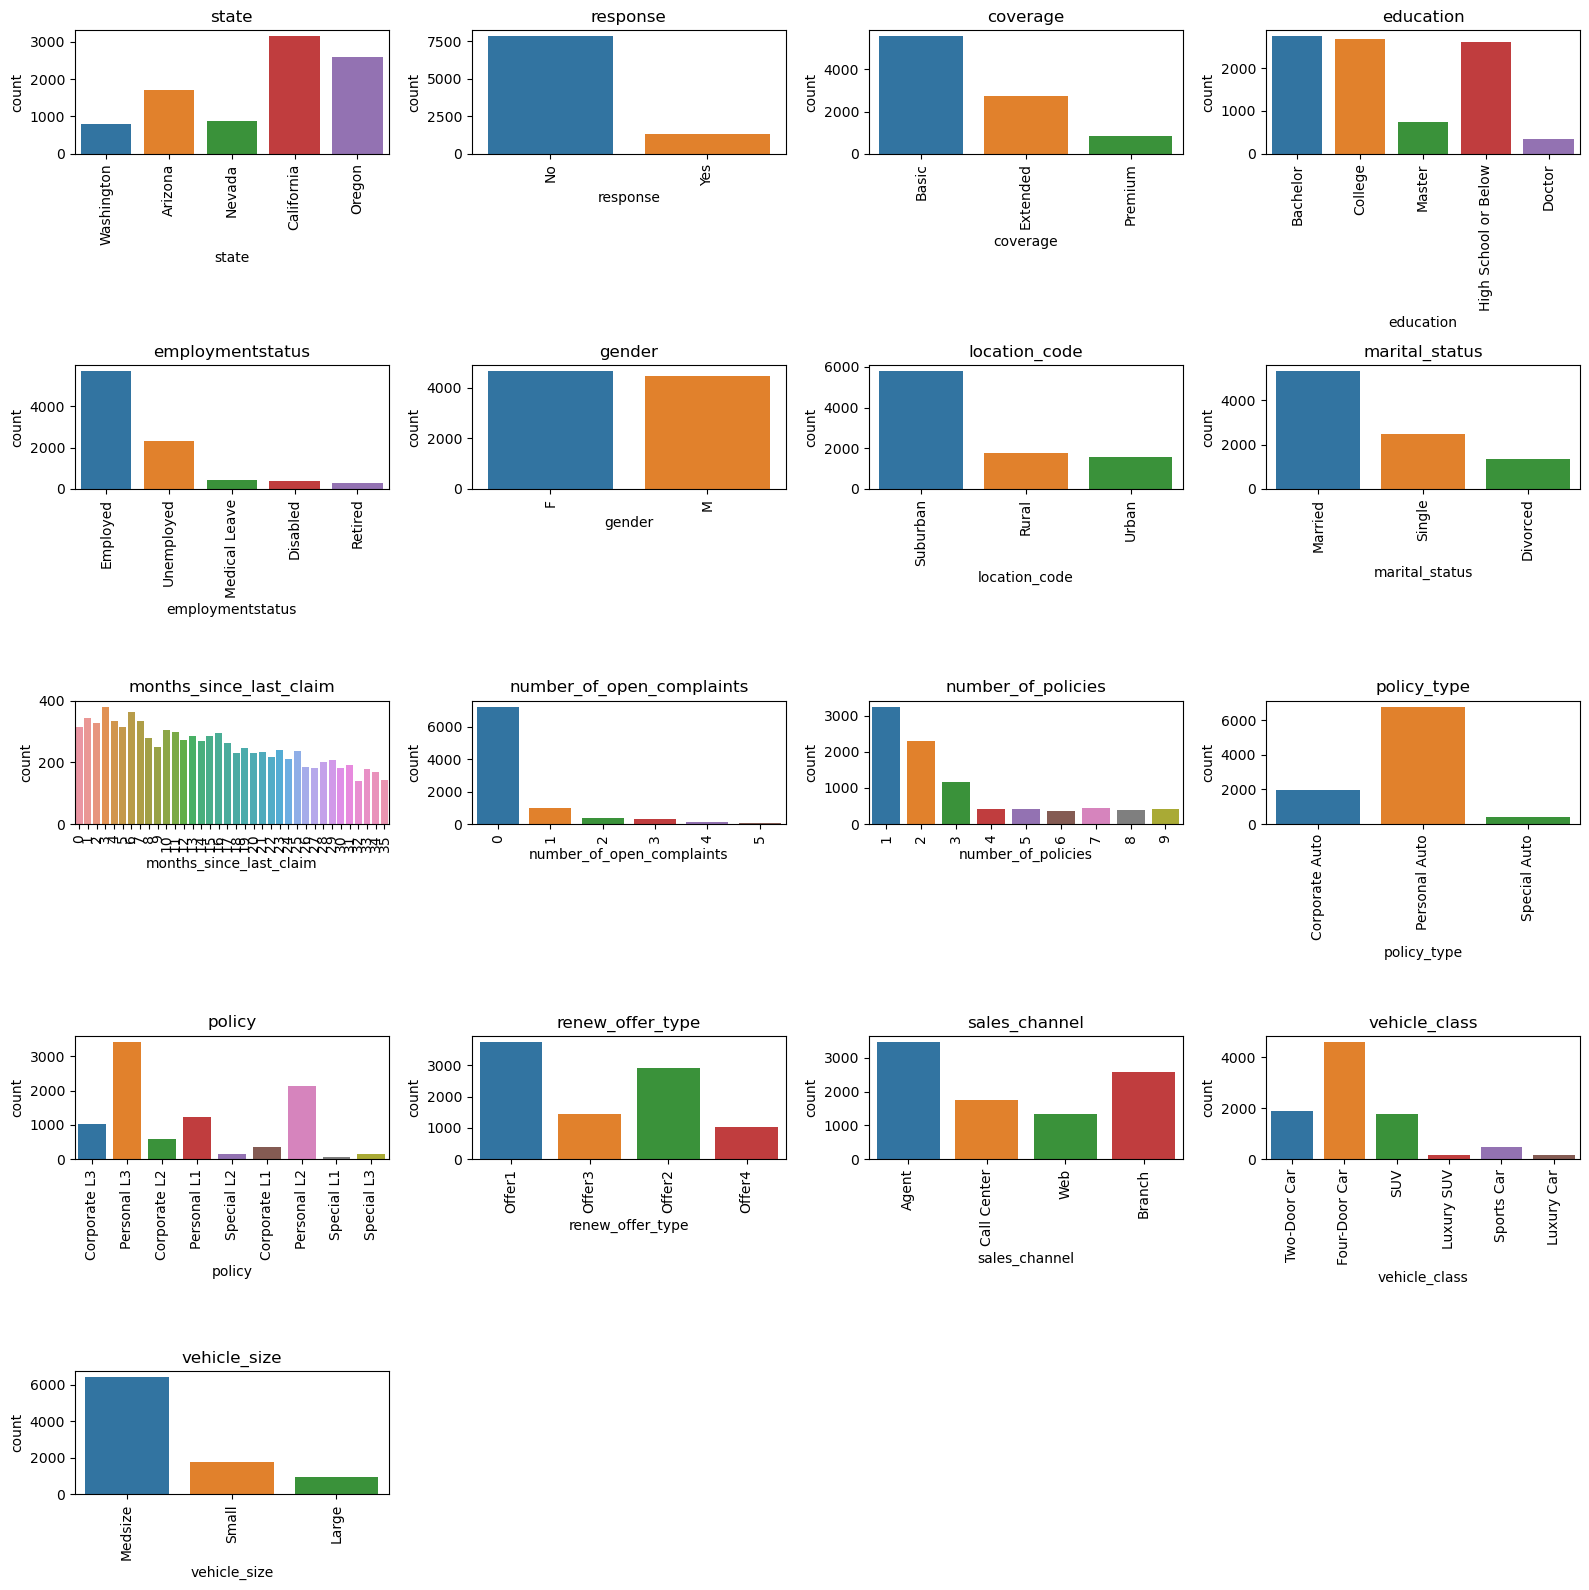

In [24]:
bar_plots=create_barplots(discrete_df)

In [25]:
#12 Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

def plot_histograms(continuous_df):
    # Set the figure size
    plt.figure(figsize=(16, 16))

    # Get the list of column names
    columns = continuous_df.columns

    # Calculate the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols - 1) // 3 + 1

    # Create subplots for each column
    for i, column in enumerate(columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(continuous_df[column], kde=True)
        plt.title(column)
        plt.xlabel("")

    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage:
# plot_histograms(continuous_df)


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

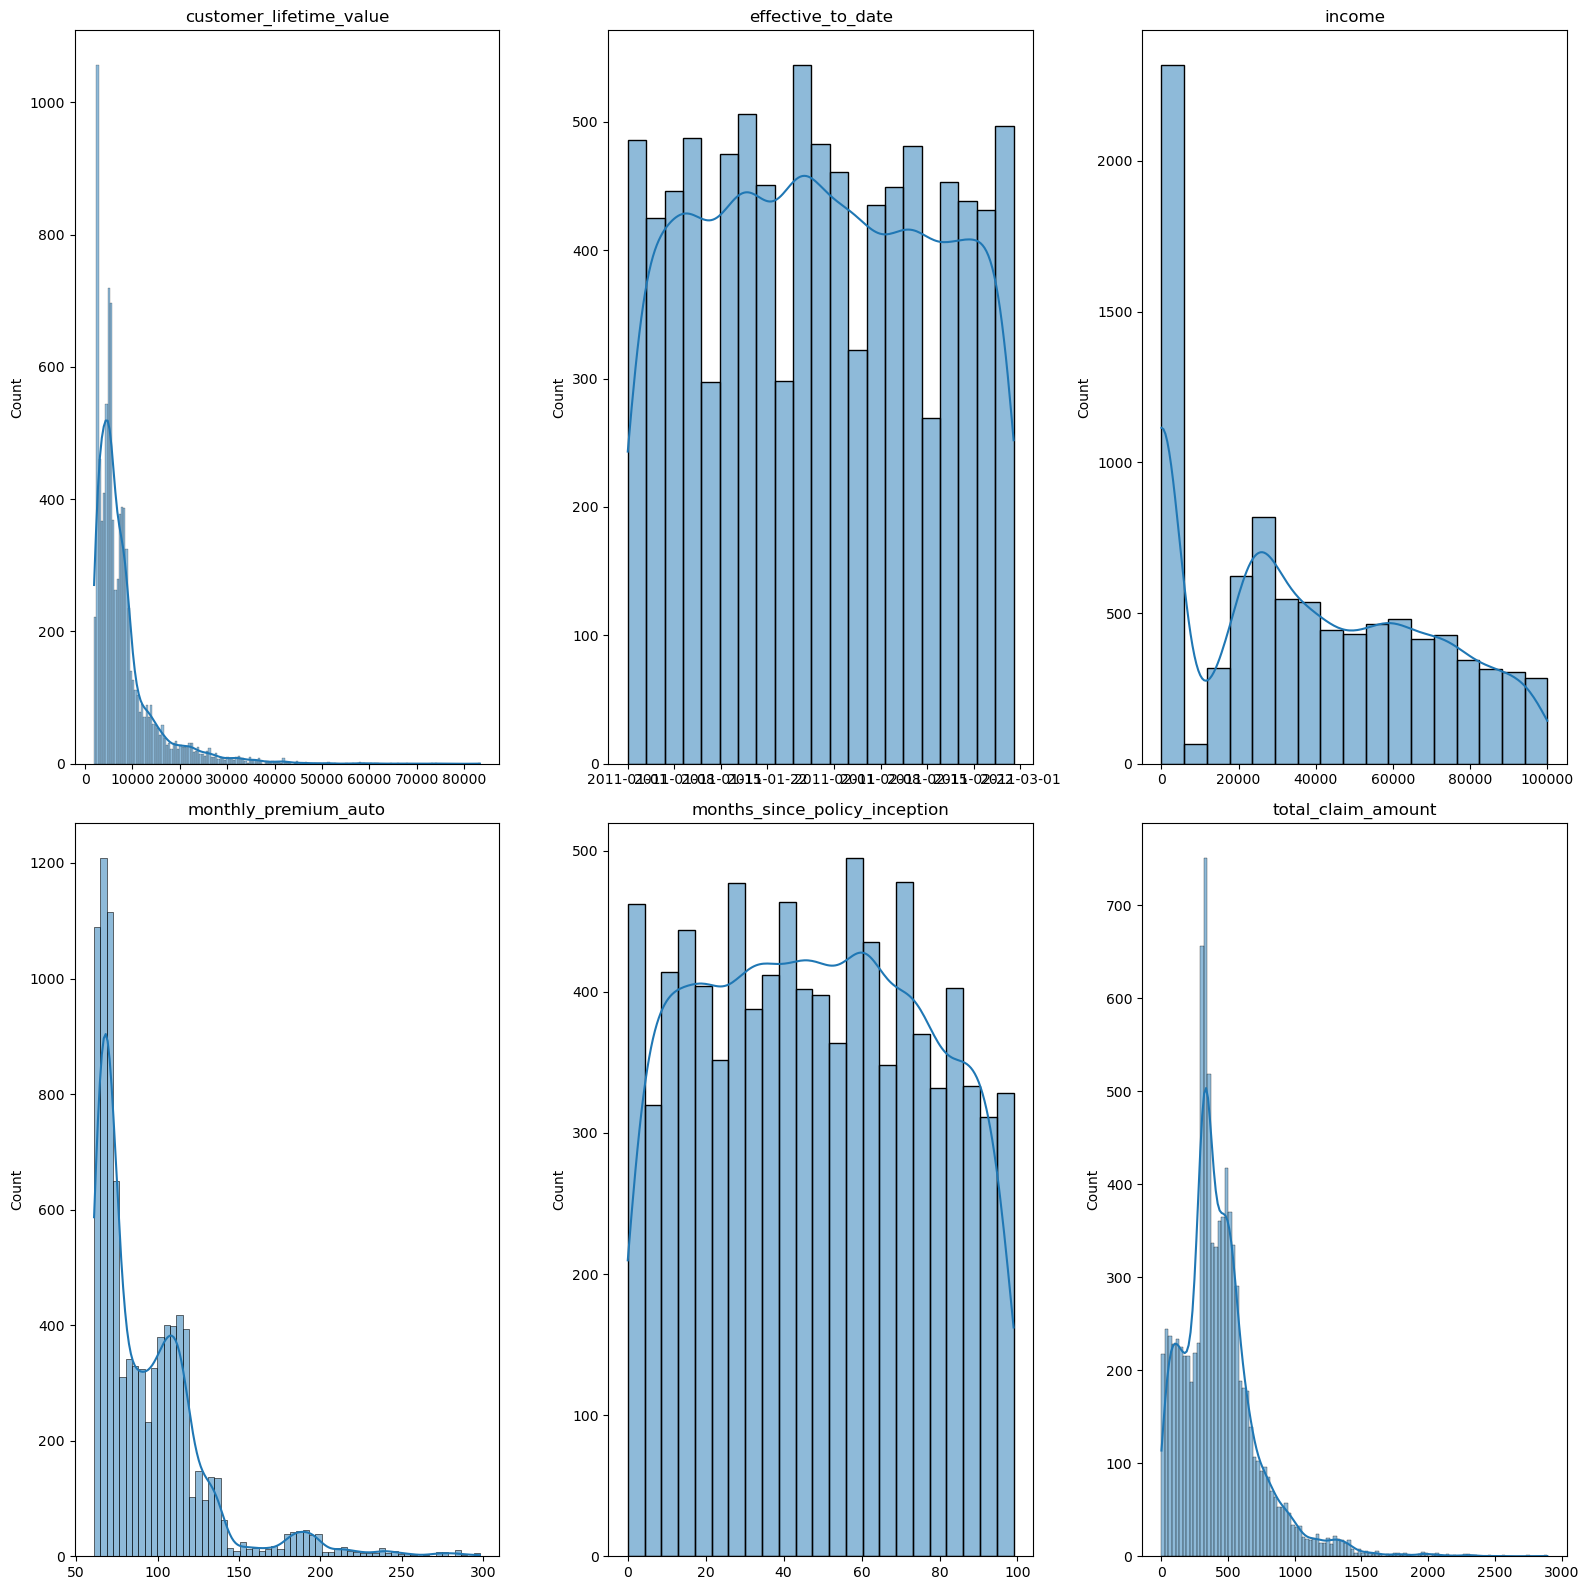

In [26]:
plot_histograms(continuous_df)

In [67]:
#13 Calc skewness & create box plots

from scipy.stats import skew

def box_plots_and_skewness(df, columns):
    # Calculate the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols - 1) // 2 + 1

    # Create subplots for each column
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    fig.suptitle("Box Plots and Skewness for Selected Columns")

    # Initialize a dictionary to store skewness values
    skewness_dict = {}

    # Calculate box plots and skewness for selected columns
    for i, column in enumerate(columns):
        row, col = divmod(i, 2)
        ax = axes[row, col]
        
        # Create box plot
        sns.boxplot(data=df, x=column, ax=ax)
        ax.set_title(f"Box Plot for '{column}'")
        ax.set_xticklabels([])  # Remove x-axis labels
        
        # Calculate skewness
        try:
            skew_value = skew(df[column])
            skewness_dict[column] = skew_value
        except Exception as e:
            skewness_dict[column] = None

        # Display skewness values
        ax.text(0.05, 0.9, f"Skewness: {skewness_dict[column]:.2f}", transform=ax.transAxes)
        
    # Adjust the layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)

    # Show the plots
    plt.show()

    return skewness_dict


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


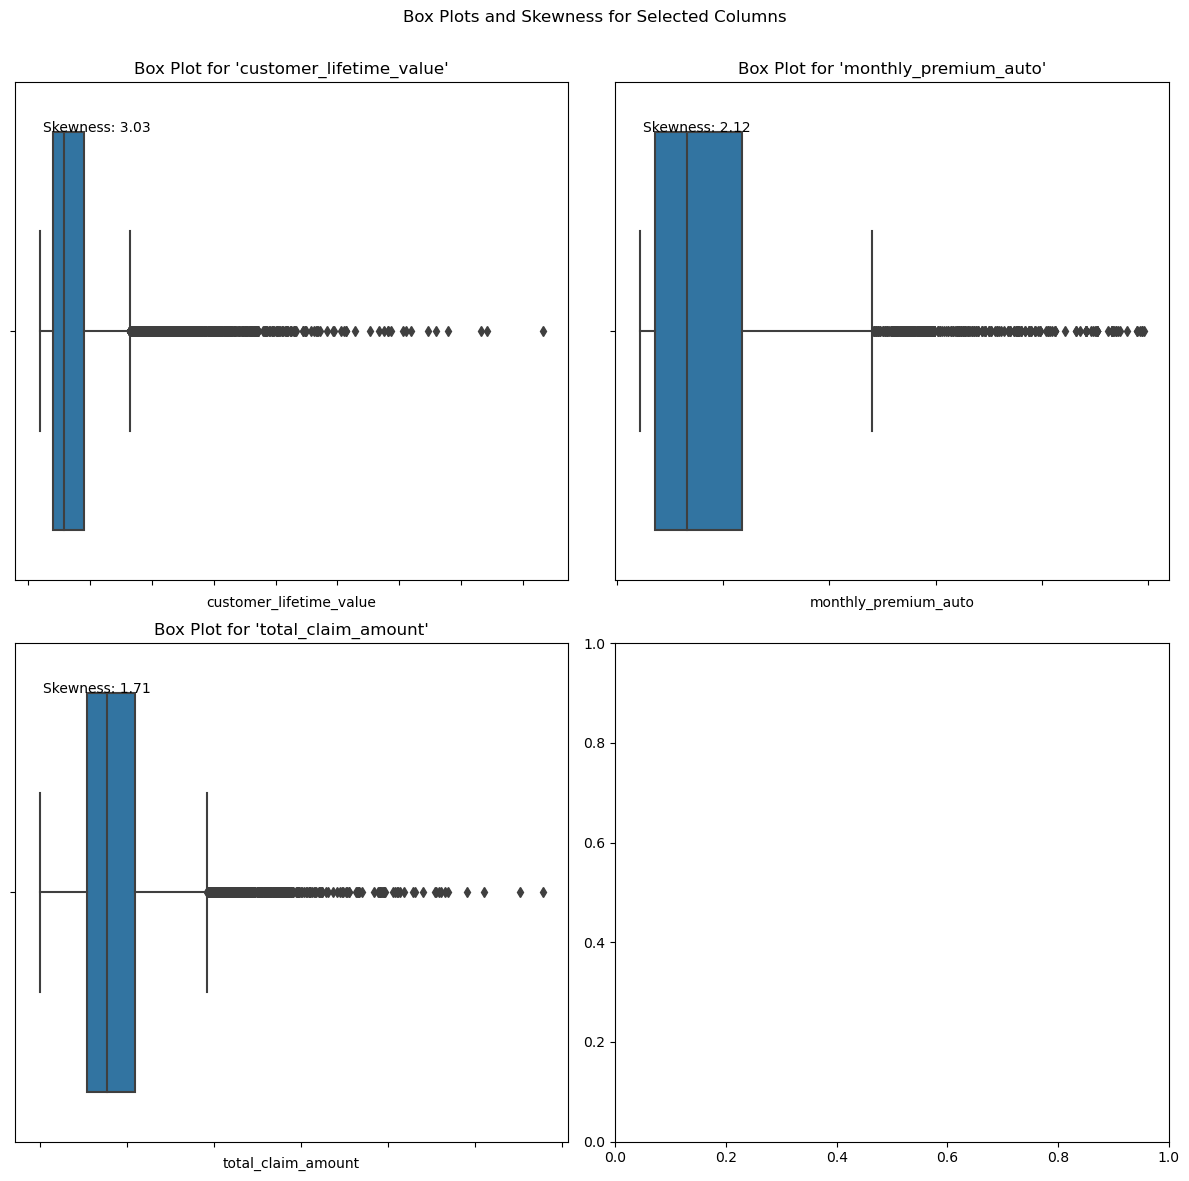

In [68]:
selected_columns = ['customer_lifetime_value',
       'monthly_premium_auto', 'total_claim_amount']
skewness = box_plots_and_skewness(continuous_df, selected_columns)

In [69]:
def get_skewed_columns(df: pd.DataFrame) -> list:
    '''
    This function will consider the numerical columns of a Pandas DataFrame and it will display a tuple of (Boolean, Skew)
    for every column. In addition, it will return a list of the column_names that have an skewness > < 2

    Input:
    df: Pandas DataFrame

    Output:
    list
    '''

    df2 = df.copy()

    my_list = [ ( column, ( df2[column].skew() > 2) or (df2[column].skew() < -2), df2[column].skew().round(1) ) for column in df2.select_dtypes(np.number).columns]

    for element in my_list:
        print(element)

    return [element[0] for element in my_list if element[1]==True]

In [70]:
skewed_columns = get_skewed_columns(continuous_df)
skewed_columns

('customer_lifetime_value', True, 3.0)
('income', False, 0.3)
('monthly_premium_auto', True, 2.1)
('months_since_policy_inception', False, 0.0)
('total_claim_amount', False, 1.7)


['customer_lifetime_value', 'monthly_premium_auto']

In [71]:
def detect_outliers_iqr(df: pd.DataFrame, columns: list) ->list:
    '''
    This function checks a column of a given Pandas DataFrame, computes the IRQ,
    the lower, and upper wiskers and flags the value as "outlier" if the value is outside the
    lower or upper wisker

    Input:
    df: Pandas DataFrame

    Output:
    Python list of indexes for values which are outliers.
    '''
    outliers = []

    for column in columns:
        df2 = df.copy()

        iqr = df2[column].quantile(0.75) - df2[column].quantile(0.25)

        lower_wisker = df2[column].quantile(0.25) - ( 1.5 * iqr)
        upper_wisker = df2[column].quantile(0.75) + ( 1.5 * iqr)

        column_outliers = df2[ (df2[column] < lower_wisker) | (df2[column] > upper_wisker) ].index.tolist()
        outliers.append({column: column_outliers})

    return outliers

In [72]:
outliers_iqr = detect_outliers_iqr(continuous_df, skewed_columns)
print("Outliers from Z-scores method: ", outliers_iqr)

Outliers from Z-scores method:  [{'customer_lifetime_value': [8, 22, 31, 50, 51, 63, 70, 79, 95, 114, 125, 168, 169, 181, 198, 232, 247, 251, 260, 262, 266, 270, 278, 292, 303, 306, 315, 325, 341, 351, 373, 375, 385, 389, 402, 404, 405, 407, 408, 409, 425, 437, 465, 480, 507, 512, 522, 538, 541, 603, 626, 636, 647, 681, 698, 711, 715, 723, 740, 751, 752, 759, 766, 786, 793, 810, 820, 832, 834, 836, 839, 856, 868, 882, 893, 907, 914, 921, 936, 940, 991, 993, 994, 1002, 1008, 1014, 1016, 1037, 1040, 1041, 1047, 1067, 1071, 1078, 1084, 1099, 1115, 1120, 1127, 1133, 1149, 1154, 1162, 1174, 1183, 1184, 1198, 1200, 1222, 1225, 1227, 1233, 1240, 1261, 1278, 1300, 1301, 1306, 1312, 1316, 1326, 1328, 1330, 1364, 1382, 1383, 1392, 1394, 1396, 1407, 1408, 1419, 1450, 1462, 1466, 1467, 1499, 1506, 1516, 1521, 1526, 1532, 1547, 1555, 1558, 1575, 1592, 1607, 1630, 1639, 1640, 1641, 1650, 1657, 1659, 1720, 1730, 1769, 1796, 1812, 1820, 1824, 1847, 1858, 1861, 1863, 1873, 1891, 1930, 1939, 1945, 1952,

C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Original customer_lifetime_value length: 9134
Cleaned customer_lifetime_value length: 8317
Original monthly_premium_auto length: 9134
Cleaned monthly_premium_auto length: 8704


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

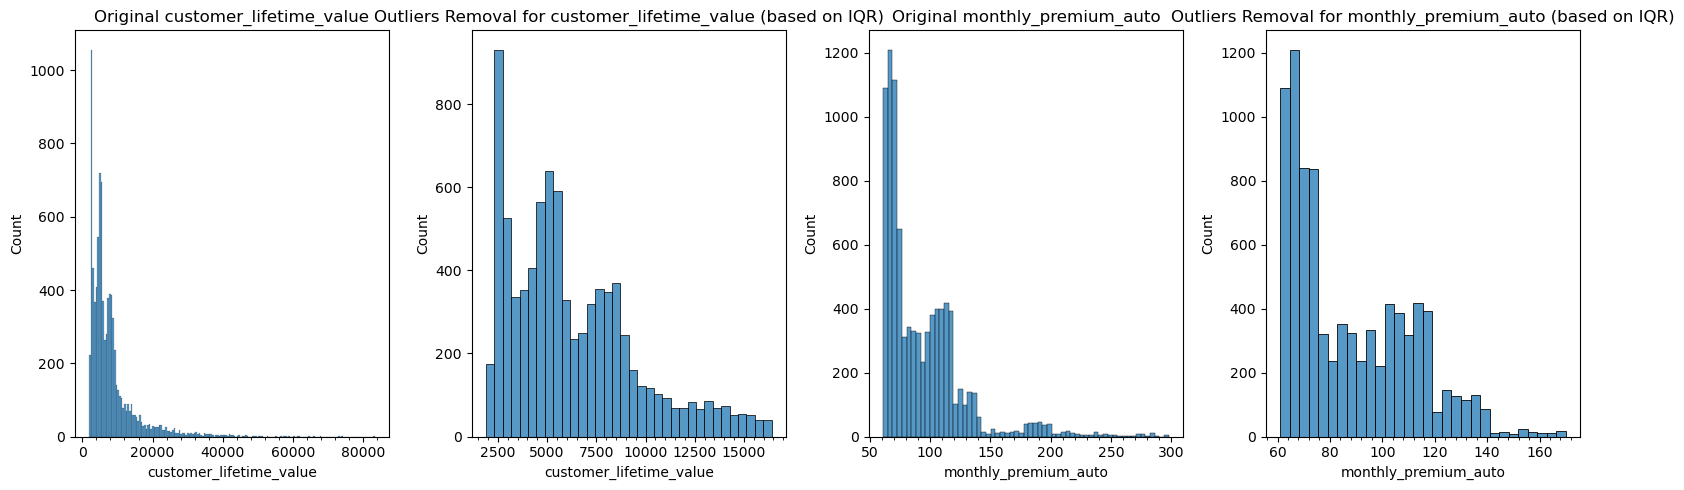

In [73]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(1, len(skewed_columns) * 2, figsize=(16, 5))
ax = ax.ravel()

for i, column in enumerate(skewed_columns):
    # Plot histograms for the original and cleaned data
    sns.histplot(data=continuous_df, x=column, ax=ax[i * 2])
    ax[i * 2].set_title(f"Original {column}")
    ax[i * 2].xaxis.set_minor_locator(AutoMinorLocator(5))

    # Create a copy of the data without outliers based on IQR
    no_outliers_iqr = continuous_df.copy()

    # Check if the column has outliers and remove them
    for outliers_dict in outliers_iqr:
        if column in outliers_dict:
            outliers_indices = outliers_dict[column]
            print(f"Original {column} length: {len(no_outliers_iqr[column])}")
            no_outliers_iqr = no_outliers_iqr.drop(outliers_indices, axis=0)
            print(f"Cleaned {column} length: {len(no_outliers_iqr[column])}")

    sns.histplot(data=no_outliers_iqr, x=column, ax=ax[i * 2 + 1])
    ax[i * 2 + 1].set_title(f"Outliers Removal for {column} (based on IQR)")
    ax[i * 2 + 1].xaxis.set_minor_locator(AutoMinorLocator(5))

plt.tight_layout()
plt.show()



C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Original customer_lifetime_value length: 9134
Cleaned customer_lifetime_value length: 8317
Original monthly_premium_auto length: 9134
Cleaned monthly_premium_auto length: 8704


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

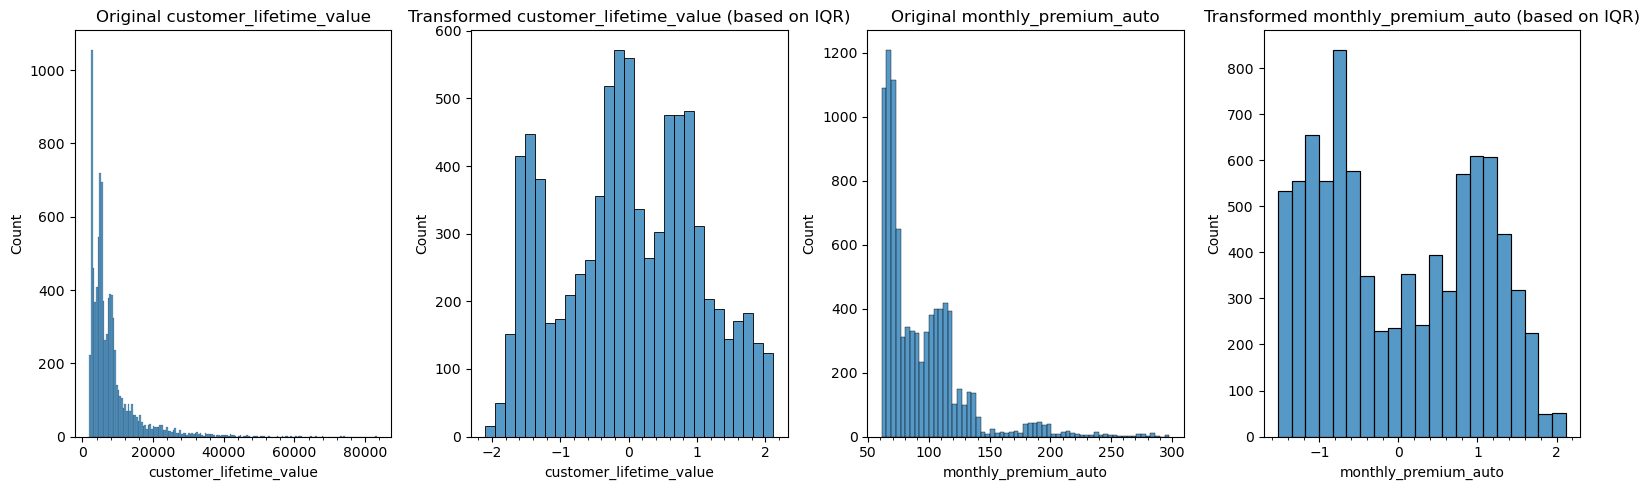

In [74]:
# apply PowerTransformer

from sklearn.preprocessing import PowerTransformer

# Instantiate the PowerTransformer
power_transformer = PowerTransformer()

fig, ax = plt.subplots(1, len(skewed_columns) * 2, figsize=(16, 5))
ax = ax.ravel()

for i, column in enumerate(skewed_columns):
    # Plot histograms for the original and cleaned data
    sns.histplot(data=continuous_df, x=column, ax=ax[i * 2])
    ax[i * 2].set_title(f"Original {column}")
    ax[i * 2].xaxis.set_minor_locator(AutoMinorLocator(5))

    # Create a copy of the data without outliers based on IQR
    no_outliers_iqr = continuous_df.copy()

    # Check if the column has outliers and remove them
    for outliers_dict in outliers_iqr:
        if column in outliers_dict:
            outliers_indices = outliers_dict[column]
            print(f"Original {column} length: {len(no_outliers_iqr[column])}")
            no_outliers_iqr = no_outliers_iqr.drop(outliers_indices, axis=0)
            print(f"Cleaned {column} length: {len(no_outliers_iqr[column])}")

    # Apply PowerTransformer to the cleaned column
    column_values = no_outliers_iqr[column].values.reshape(-1, 1)
    transformed_values = power_transformer.fit_transform(column_values)
    no_outliers_iqr[column] = transformed_values

    sns.histplot(data=no_outliers_iqr, x=column, ax=ax[i * 2 + 1])
    ax[i * 2 + 1].set_title(f"Transformed {column} (based on IQR)")
    ax[i * 2 + 1].xaxis.set_minor_locator(AutoMinorLocator(5))

plt.tight_layout()
plt.show()


Lab Cleaning Categorical Data

In [75]:
#1 Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

def plot_categorical_countplots(dataframe):
    # Get the list of categorical columns
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    # Calculate the number of rows and columns needed for subplots
    num_columns = 3
    num_rows = (len(categorical_columns) + num_columns - 1) // num_columns

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(categorical_columns):
        # Calculate the cardinality of the column (unique values)
        cardinality = len(dataframe[column].unique())

        if cardinality >= 6:
            # If cardinality is 6 or more, plot bars on the y-axis
            sns.countplot(y=column, data=dataframe, order=dataframe[column].value_counts().index, palette='viridis', ax=axes[i])
            axes[i].set_title(f'Countplot of {column}')
            axes[i].set_xlabel('Frequency')
            axes[i].set_ylabel(column)
        else:
            # Otherwise, plot bars on the x-axis
            sns.countplot(x=column, data=dataframe, order=dataframe[column].value_counts().index, palette='viridis', ax=axes[i])
            axes[i].set_title(f'Countplot of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

    # Hide any remaining empty subplots
    for j in range(i + 1, num_columns * num_rows):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

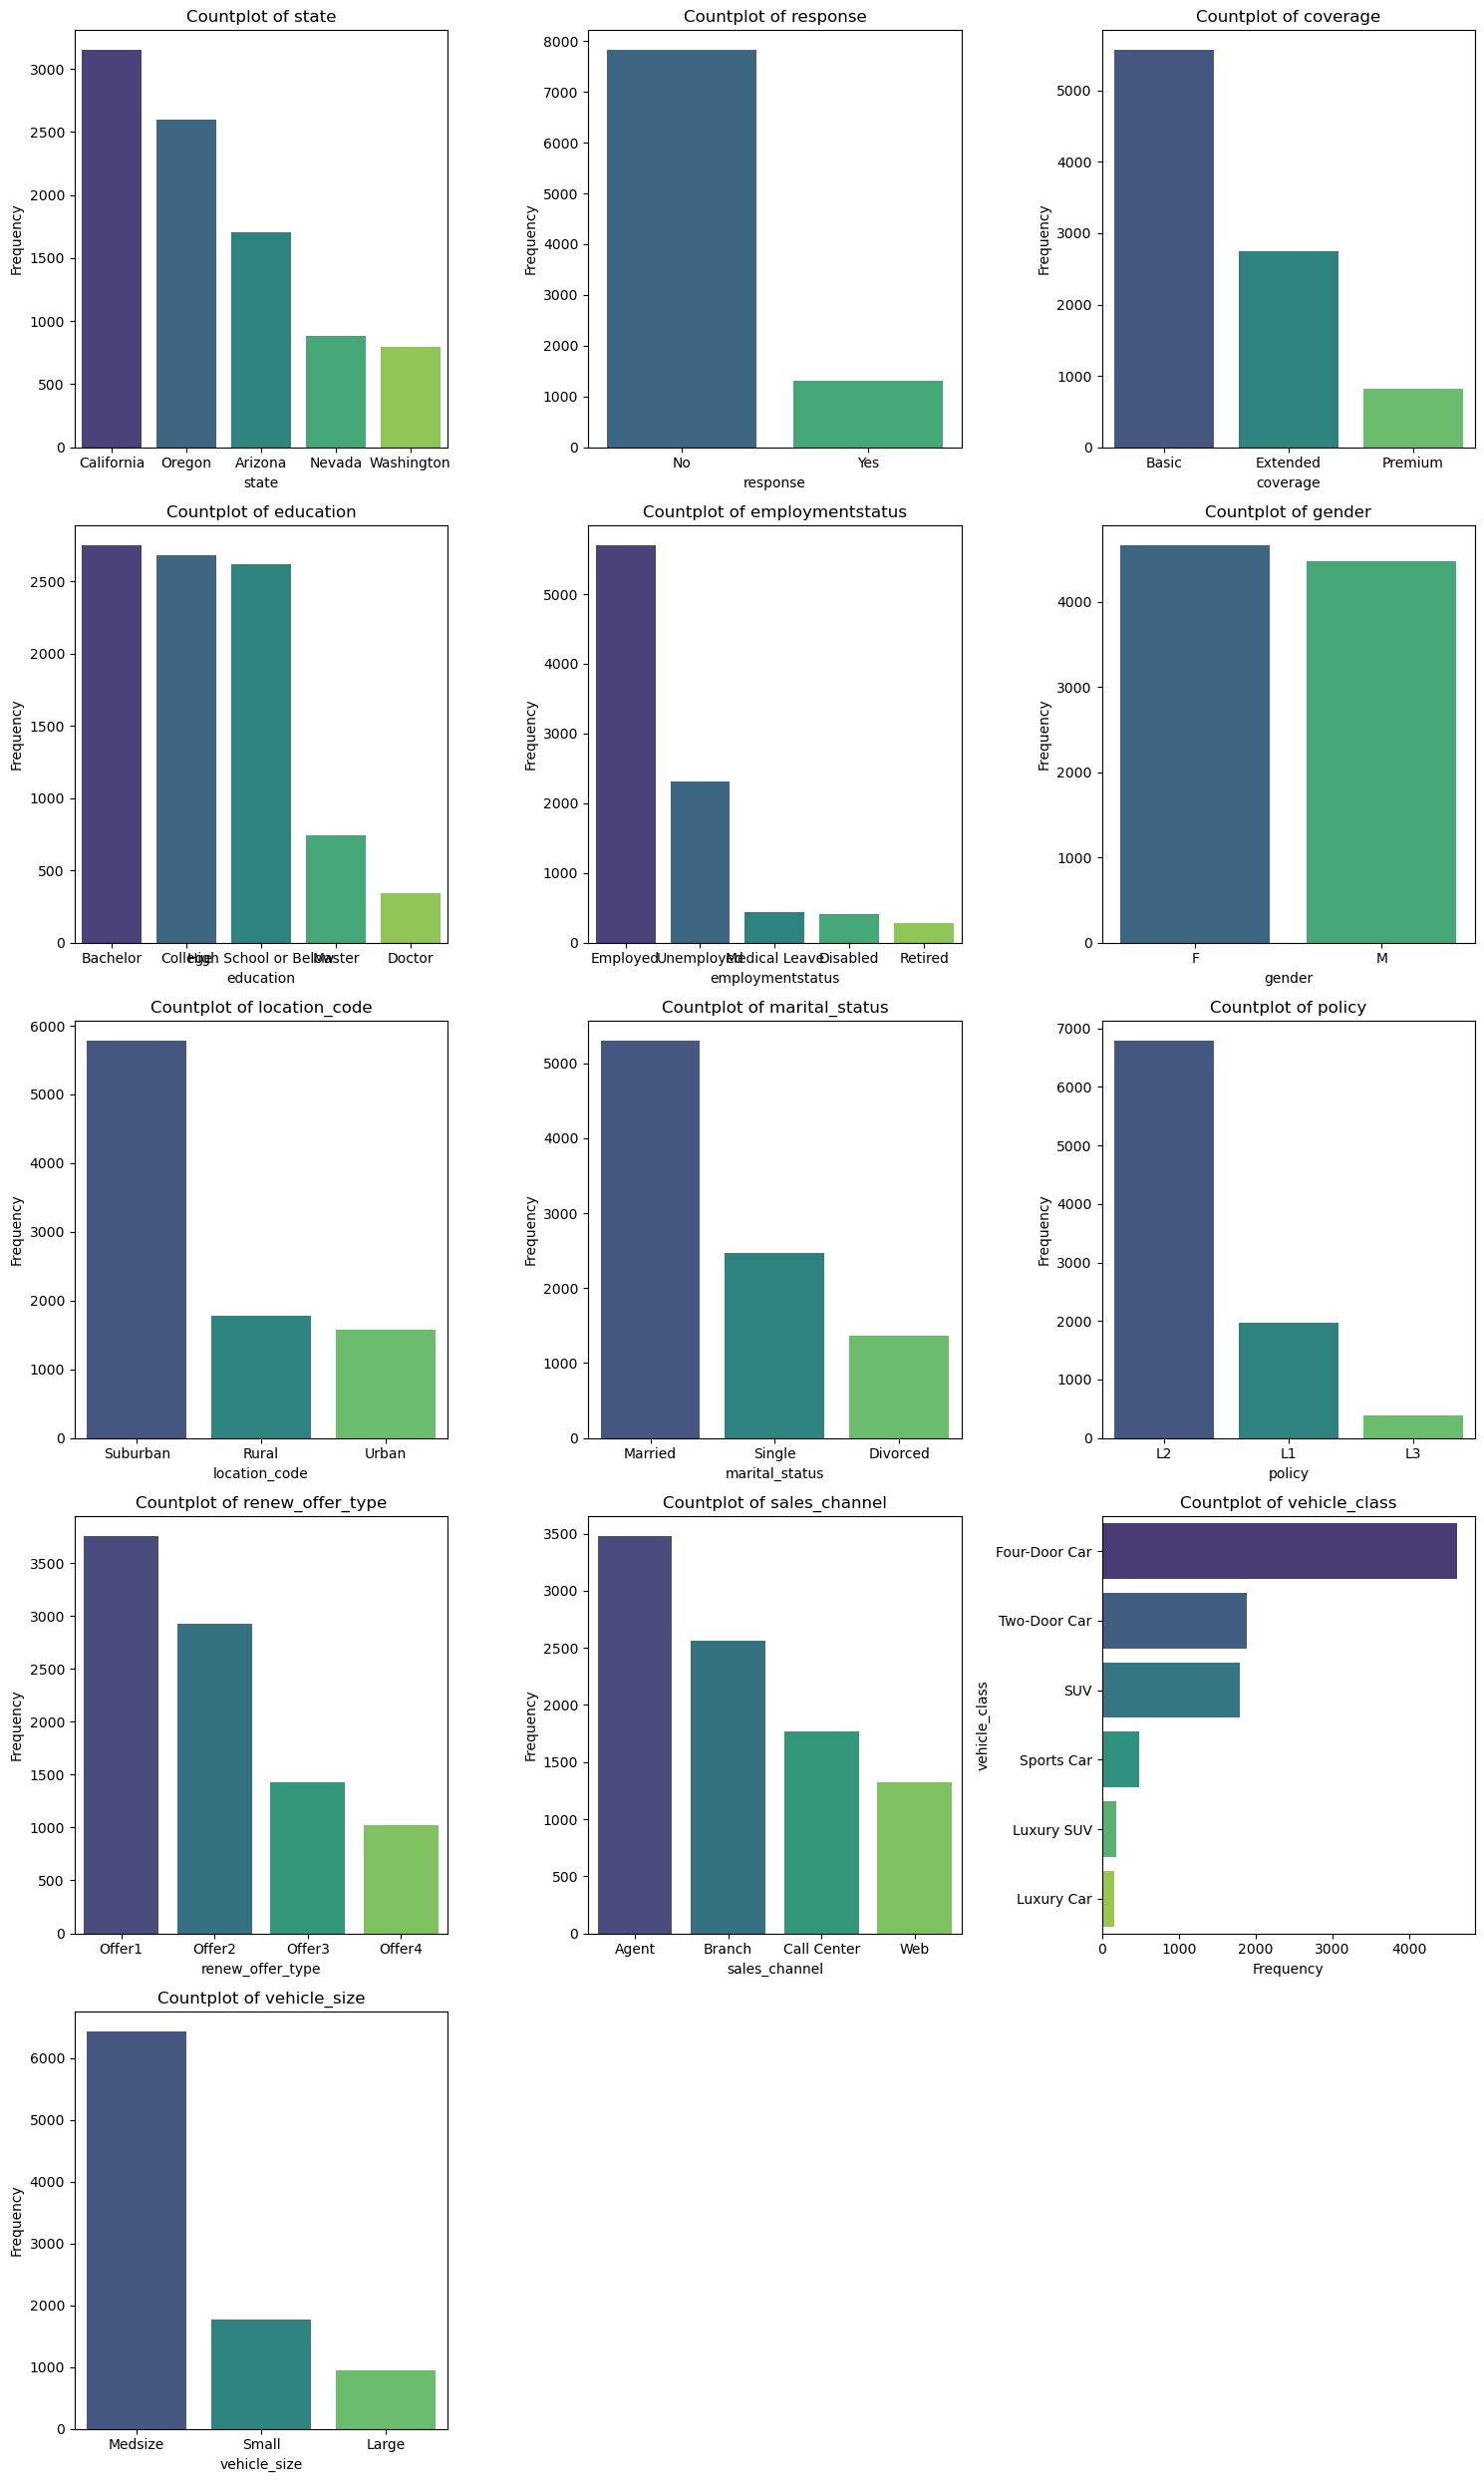

In [76]:
plot_categorical_countplots(customer_df)

In [77]:
#2 policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.y

# Function to transform the 'policy' column
def transform_policy(policy_type, policy):
    # Check the policy type and map it to L1, L2, or L3
    if policy_type == 'Corporate Auto':
        return 'L1'
    elif policy_type == 'Personal Auto':
        return 'L2'
    else:
        return 'L3'

# Apply the transformation to the DataFrame
customer_df['policy'] = customer_df.apply(lambda row: transform_policy(row['policy_type'], row['policy']), axis=1)

# Drop the 'policy_type' column
customer_df.drop(columns=['policy_type'], inplace=True)

print(customer_df)


KeyError: 'policy_type'

In [ ]:
#3 Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

plt.figure(figsize=(10, 10))
sns.lineplot(data=customer_df, x='effective_to_date', y='total_claim_amount')
plt.title('Time Dependency Analysis of Total Claim Amount')
plt.xlabel('Effective To Date')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [ ]:
#4 
"""define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount"""

# Create an empty DataFrame with the desired columns
time_df = pd.DataFrame()

# Extract date-related information from 'effective_to_date'
time_df['day'] = customer_df['effective_to_date'].dt.day
time_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
time_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = customer_df['effective_to_date'].dt.strftime('%B')

# Add the 'total_claim_amount' column
time_df['total_claim_amount'] = customer_df['total_claim_amount']

# Display the new DataFrame
print(time_df)


In [ ]:
#5 Compute the total "target" column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

# Step 1: Calculate the total target column aggregated by 'day_name' and round the values
target = time_df.groupby('day_name')['total_claim_amount'].sum().round(2)

# Step 2: Define the list of correct days in the desired order
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 3: Reorder the index using .reindex()
target = target.reindex(index=list_of_correct_days)

# Display the resulting Pandas Series
print(target)


In [ ]:
#6 Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

# Create a line plot
plt.figure(figsize=(4, 4))
sns.lineplot(x=target.index, y=target.values, marker='o', color='b')
plt.title("Total Claim Amount by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Claim Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [ ]:
#7 Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

# Group data by day_name and count the number of claims
claims_by_day = time_df.groupby("day_name")["total_claim_amount"].count()

# List of correct day names
list_of_correct_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# Reindex the series with the correct order
claims_by_day = claims_by_day.reindex(index=list_of_correct_values)

# Print the resulting Pandas Series
print(claims_by_day)


In [ ]:
target = target.sort_values(ascending=False)

In [ ]:
#8 Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

# Calculate the median of "total_claim_amount" by day_name
median_by_day = time_df.groupby('day_name')['total_claim_amount'].median().round(2)

# Sort the median values in descending order
median_by_day = median_by_day.sort_values(ascending=False)


#9 Plot the median "target" by day of the week name using a seaborn barplot

plt.figure(figsize=(6, 4))
sns.barplot(x=median_by_day.index, y=median_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Median Total Claim Amount')
plt.title('Median Total Claim Amount by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
#11 Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

# Step 1: Calculate the total target column aggregated by 'month' and round the values
total_claim_by_month = time_df.groupby('month')['total_claim_amount'].sum().round(2)

# Step 2: Define the list of correct months in the desired order
list_of_correct_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

# Step 3: Reorder the index using .reindex()
total_claim_by_month = total_claim_by_month.reindex(index=list_of_correct_months)

# Display the resulting Pandas Series
print(total_claim_by_month)


In [78]:
#13 Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

def remove_outliers(df, column, thr=3):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - thr * std
    upper_bound = mean + thr * std
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [79]:
#14.	Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

continuous_cleaned_df = customer_df.copy()
continuous_columns = ['income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
for column in continuous_columns:
    continuous_cleaned_df = remove_outliers(continuous_cleaned_df, column)
continuous_cleaned_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,L1,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,42,0,8,L2,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,L2,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,65,0,7,L1,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,L2,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,18,89,0,2,L2,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,14,28,0,1,L1,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,9,37,3,2,L1,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,34,3,0,3,L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [80]:
#15.	Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe

final_df = pd.concat([continuous_cleaned_df, discrete_df, categorical_df, time_df['total_claim_amount']], axis=1)
final_df = final_df.dropna().reset_index(drop=True)


In [81]:
#16.	Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

final_df = final_df[[col for col in final_df.columns if col != 'total_claim_amount'] + ['total_claim_amount']]


In [82]:
final_df

,state,state,state,customer_lifetime_value,response,response,response,coverage,coverage,coverage,...,sales_channel,sales_channel,vehicle_class,vehicle_class,vehicle_class,vehicle_size,vehicle_size,vehicle_size,total_claim_amount,total_claim_amount
0,Washington,Washington,Washington,2763.519279,No,No,No,Basic,Basic,Basic,...,Agent,Agent,Two-Door Car,Two-Door Car,Two-Door Car,Medsize,Medsize,Medsize,384.811147,384.811147
1,Arizona,Arizona,Arizona,6979.535903,No,No,No,Extended,Extended,Extended,...,Agent,Agent,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,1131.464935,1131.464935
2,Nevada,Nevada,Nevada,12887.431650,No,No,No,Premium,Premium,Premium,...,Agent,Agent,Two-Door Car,Two-Door Car,Two-Door Car,Medsize,Medsize,Medsize,566.472247,566.472247
3,California,California,California,7645.861827,No,No,No,Basic,Basic,Basic,...,Call Center,Call Center,SUV,SUV,SUV,Medsize,Medsize,Medsize,529.881344,529.881344
4,Washington,Washington,Washington,2813.692575,No,No,No,Basic,Basic,Basic,...,Agent,Agent,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,138.130879,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,California,California,California,23405.987980,No,No,No,Basic,Basic,Basic,...,Web,Web,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,198.234764,198.234764
8729,California,California,California,3096.511217,Yes,Yes,Yes,Extended,Extended,Extended,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,379.200000,379.200000
8730,California,California,California,8163.890428,No,No,No,Extended,Extended,Extended,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,790.784983,790.784983
8731,California,California,California,7524.442436,No,No,No,Extended,Extended,Extended,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,Large,Large,Large,691.200000,691.200000


In [83]:
#17.	Turn the response column values into (Yes=1/No=0).

final_df['response'] = final_df['response'].replace({'Yes': 1, 'No': 0})


In [84]:
#18.	Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

final_df['education'] = final_df['education'].replace(['Master', 'Doctor'], 'Graduate')


In [85]:
#19.	Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

final_df['employmentstatus'] = final_df['employmentstatus'].replace(['Medical Leave', 'Disabled', 'Retired'], 'Inactive')


In [86]:
#20.	Deal with column Gender turning the values into (1/0).

final_df['gender'] = final_df['gender'].replace({'F': 1, 'M': 0})


In [87]:
#21.	Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

final_df['vehicle_class'] = final_df['vehicle_class'].replace(['Sports Car', 'Luxury SUV', 'Luxury Car'], 'Luxury')


In [88]:
final_df

,state,state,state,customer_lifetime_value,response,response,response,coverage,coverage,coverage,...,sales_channel,sales_channel,vehicle_class,vehicle_class,vehicle_class,vehicle_size,vehicle_size,vehicle_size,total_claim_amount,total_claim_amount
0,Washington,Washington,Washington,2763.519279,0,0,0,Basic,Basic,Basic,...,Agent,Agent,Two-Door Car,Two-Door Car,Two-Door Car,Medsize,Medsize,Medsize,384.811147,384.811147
1,Arizona,Arizona,Arizona,6979.535903,0,0,0,Extended,Extended,Extended,...,Agent,Agent,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,1131.464935,1131.464935
2,Nevada,Nevada,Nevada,12887.431650,0,0,0,Premium,Premium,Premium,...,Agent,Agent,Two-Door Car,Two-Door Car,Two-Door Car,Medsize,Medsize,Medsize,566.472247,566.472247
3,California,California,California,7645.861827,0,0,0,Basic,Basic,Basic,...,Call Center,Call Center,SUV,SUV,SUV,Medsize,Medsize,Medsize,529.881344,529.881344
4,Washington,Washington,Washington,2813.692575,0,0,0,Basic,Basic,Basic,...,Agent,Agent,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,138.130879,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,California,California,California,23405.987980,0,0,0,Basic,Basic,Basic,...,Web,Web,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,198.234764,198.234764
8729,California,California,California,3096.511217,1,1,1,Extended,Extended,Extended,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,379.200000,379.200000
8730,California,California,California,8163.890428,0,0,0,Extended,Extended,Extended,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,Medsize,Medsize,Medsize,790.784983,790.784983
8731,California,California,California,7524.442436,0,0,0,Extended,Extended,Extended,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,Large,Large,Large,691.200000,691.200000


In [89]:
#22.	deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

coverage_mapping = {'Basic': 0, 'Extended': 1, 'Premium': 2}
final_df['coverage'] = final_df['coverage'].replace(coverage_mapping)

In [90]:
#23.	Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

employmentstatus_mapping = {'Unemployed': 0, 'Inactive': 1, 'Employed': 2}
final_df['employmentstatus'] = final_df['employmentstatus'].replace(employmentstatus_mapping)


In [91]:
#24.	Encode the column location_code as: "Urban" > "Suburban" > "Rural".

location_mapping = {'Rural': 0, 'Suburban': 1, 'Urban': 2}
final_df['location_code'] = final_df['location_code'].replace(location_mapping)


In [92]:
#25.	Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

vehicle_size_mapping = {'Small': 0, 'Medsize': 1, 'Large': 2}
final_df['vehicle_size'] = final_df['vehicle_size'].replace(vehicle_size_mapping)
final_df

,state,state,state,customer_lifetime_value,response,response,response,coverage,coverage,coverage,...,sales_channel,sales_channel,vehicle_class,vehicle_class,vehicle_class,vehicle_size,vehicle_size,vehicle_size,total_claim_amount,total_claim_amount
0,Washington,Washington,Washington,2763.519279,0,0,0,0,0,0,...,Agent,Agent,Two-Door Car,Two-Door Car,Two-Door Car,1,1,1,384.811147,384.811147
1,Arizona,Arizona,Arizona,6979.535903,0,0,0,1,1,1,...,Agent,Agent,Four-Door Car,Four-Door Car,Four-Door Car,1,1,1,1131.464935,1131.464935
2,Nevada,Nevada,Nevada,12887.431650,0,0,0,2,2,2,...,Agent,Agent,Two-Door Car,Two-Door Car,Two-Door Car,1,1,1,566.472247,566.472247
3,California,California,California,7645.861827,0,0,0,0,0,0,...,Call Center,Call Center,SUV,SUV,SUV,1,1,1,529.881344,529.881344
4,Washington,Washington,Washington,2813.692575,0,0,0,0,0,0,...,Agent,Agent,Four-Door Car,Four-Door Car,Four-Door Car,1,1,1,138.130879,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,California,California,California,23405.987980,0,0,0,0,0,0,...,Web,Web,Four-Door Car,Four-Door Car,Four-Door Car,1,1,1,198.234764,198.234764
8729,California,California,California,3096.511217,1,1,1,1,1,1,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,1,1,1,379.200000,379.200000
8730,California,California,California,8163.890428,0,0,0,1,1,1,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,1,1,1,790.784983,790.784983
8731,California,California,California,7524.442436,0,0,0,1,1,1,...,Branch,Branch,Four-Door Car,Four-Door Car,Four-Door Car,2,2,2,691.200000,691.200000


In [93]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_type,total_claim_amount
0,Washington,2763.519279,0,0,Bachelor,2011-02-24,2,1,56274.0,1,...,5.0,0.0,1.0,L1,Offer1,Agent,Two-Door Car,1,Corporate Auto,384.811147
1,Arizona,6979.535903,0,1,Bachelor,2011-01-31,0,1,0.0,1,...,42.0,0.0,8.0,L2,Offer3,Agent,Four-Door Car,1,Personal Auto,1131.464935
2,Nevada,12887.431650,0,2,Bachelor,2011-02-19,2,1,48767.0,1,...,38.0,0.0,2.0,L2,Offer1,Agent,Two-Door Car,1,Personal Auto,566.472247
3,California,7645.861827,0,0,Bachelor,2011-01-20,0,0,0.0,1,...,65.0,0.0,7.0,L1,Offer1,Call Center,SUV,1,Corporate Auto,529.881344
4,Washington,2813.692575,0,0,Bachelor,2011-02-03,2,0,43836.0,0,...,44.0,0.0,1.0,L2,Offer1,Agent,Four-Door Car,1,Personal Auto,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,California,23405.987980,0,0,Bachelor,2011-02-10,2,0,71941.0,2,...,89.0,0.0,2.0,L2,Offer2,Web,Four-Door Car,1,Personal Auto,198.234764
8729,California,3096.511217,1,1,College,2011-02-12,2,1,21604.0,1,...,28.0,0.0,1.0,L1,Offer1,Branch,Four-Door Car,1,Corporate Auto,379.200000
8730,California,8163.890428,0,1,Bachelor,2011-02-06,0,0,0.0,1,...,37.0,3.0,2.0,L1,Offer1,Branch,Four-Door Car,1,Corporate Auto,790.784983
8731,California,7524.442436,0,1,College,2011-02-03,2,0,21941.0,1,...,3.0,0.0,3.0,L2,Offer3,Branch,Four-Door Car,2,Personal Auto,691.200000


In [95]:
#26.	Get a dataframe with the categorical nominal columns

categorical_nominal_df = final_df[['state', 'sales_channel']]


In [96]:
#27 Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
#abs   levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

# Initialize the levels list
levels = []

# Iterate through the categorical columns and get unique values for each
for column in categorical_nominal_df.columns:
    unique_values = final_df[column].unique()
    levels.append(list(unique_values))

# 'levels' now contains lists of unique values for each column
print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], ['Agent', 'Call Center', 'Web', 'Branch']]


In [97]:
#28 Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)
encoder

OneHotEncoder(categories=[['Washington', 'Arizona', 'Nevada', 'California',
                           'Oregon'],
                          ['Agent', 'Call Center', 'Web', 'Branch']],
              drop='first')

In [98]:
######